#Importación de base de datos

In [51]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/precios_pdtos_agricolas.cvs')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,n.d.,n.d.,29ago2023,11.121894,-73.885279


In [52]:
#Inicialmente se puede observar que en las columnas de precio y variabilidad hay algunos valores n.d, los cuales deben contemplarse como valores faltantes

df['precio'] = pd.to_numeric(df['precio'], errors='coerce')
df['variabilidad'] = pd.to_numeric(df['variabilidad'], errors='coerce')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,NaN,NaN,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,NaN,NaN,29ago2023,11.121894,-73.885279


#Datos duplicados

In [53]:
#Importar libreria pandas
import pandas as pd

#Identificar filas duplicadas
duplicados = df.duplicated()

#Imprimir las filas duplicadas
print(duplicados)

0       False
1       False
2       False
3       False
4       False
        ...  
8850    False
8851    False
8852    False
8853    False
8854    False
Length: 8855, dtype: bool


Se descarta que hayan filas duplicadas

#Datos faltantes

In [54]:
#Identificar los valores no faltantes y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8855 entries, 0 to 8854
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      8855 non-null   object 
 1   ciudad        8855 non-null   object 
 2   precio        6669 non-null   float64
 3   variabilidad  6526 non-null   float64
 4   fecha         8855 non-null   object 
 5   LATITUD       8050 non-null   float64
 6   LONGITUD      8050 non-null   float64
dtypes: float64(4), object(3)
memory usage: 484.4+ KB


In [55]:
#Identificar las variables que tienen datos faltantes
df.isnull().any()

producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool

In [56]:
#Imprimir la cantidad de valores faltantes de cada columna
print(df.isnull().sum())

producto           0
ciudad             0
precio          2186
variabilidad    2329
fecha              0
LATITUD          805
LONGITUD         805
dtype: int64


Al utilizar la función 'info', es evidente que existen valores faltantes en las columnas 'precio', 'variabilidad', 'LATITUD' y 'LONGITUD', los cuales necesitan ser abordados. Esta observación se confirma al emplear la función 'isnull', que identifica las columnas específicas que contienen datos no disponibles. Además, para cuantificar la cantidad de valores faltantes en cada columna podemos utilizar 'isnull().sum()

###Imputación de datos faltantes

####1. Para el precio y la variabilidad

In [57]:
#Interpola un valor numerico con el método lineal
df['precio'] = df['precio'].interpolate(method='linear')
df['variabilidad'] = df['variabilidad'].interpolate(method='linear')
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279


####2. Para la LATITUD y LONGITUD

In [58]:
#Muestra los valores faltantes de una columna
bool = pd.isnull(df["LATITUD"])
bool = pd.isnull(df["LONGITUD"])
df[bool]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
4,Arveja verde en vaina,cúcuta,9417.000000,0.110000,01ago2023,NaN,NaN
15,Cebolla cabezona blanca,cúcuta,1958.000000,-0.150000,01ago2023,NaN,NaN
26,Cebolla junca,cúcuta,1341.000000,0.340000,01ago2023,NaN,NaN
37,Chócolo mazorca,cúcuta,1364.000000,0.250000,01ago2023,NaN,NaN
48,Fríjol verde*,cúcuta,3100.000000,-0.095000,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8804,Papa negra*,cúcuta,1400.000000,0.013333,29ago2023,NaN,NaN
8815,Papa criolla,cúcuta,2883.000000,0.060000,29ago2023,NaN,NaN
8826,Plátano guineo,cúcuta,1778.571429,0.002857,29ago2023,NaN,NaN
8837,Plátano hartón verde,cúcuta,2758.000000,0.000000,29ago2023,NaN,NaN


In [59]:
#Definir los valores de LATITUD y LONGITUD para Cúcuta
latitud_cucuta = 7.8939100
longitud_cucuta = -72.5078200

#Utilizar la funcion fillna para reemplazar los valores faltantes en 'LATITUD' y 'LONGITUD' para la ciudad 'Cúcuta'
df.loc[df['ciudad'] == 'cúcuta', 'LATITUD'] = df.loc[df['ciudad'] == 'cúcuta', 'LATITUD'].fillna(latitud_cucuta)
df.loc[df['ciudad'] == 'cúcuta', 'LONGITUD'] = df.loc[df['ciudad'] == 'cúcuta', 'LONGITUD'].fillna(longitud_cucuta)
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,7.893910,-72.507820
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279


In [60]:
#Identificar las variables que tienen datos faltantes
df.isnull().any()

producto        False
ciudad          False
precio          False
variabilidad    False
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool

In [61]:
#Muestra los valores faltantes de una columna
bool = pd.isnull(df["LATITUD"])
bool = pd.isnull(df["LONGITUD"])
df[bool]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
387,Arveja verde en vaina,cartagena,7412.5,0.060000,02ago2023,NaN,NaN
399,Cebolla cabezona blanca,cartagena,2250.0,-0.020000,02ago2023,NaN,NaN
411,Cebolla junca,cartagena,2934.5,0.055000,02ago2023,NaN,NaN
423,Chócolo mazorca,cartagena,656.0,-0.190000,02ago2023,NaN,NaN
435,Fríjol verde*,cartagena,3400.0,-0.035000,02ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8404,Papa negra*,cartagena,1480.0,0.010000,28ago2023,NaN,NaN
8418,Papa criolla,cartagena,4300.0,-0.030000,28ago2023,NaN,NaN
8432,Plátano guineo,cartagena,1550.0,-0.042857,28ago2023,NaN,NaN
8446,Plátano hartón verde,cartagena,2700.0,-0.090000,28ago2023,NaN,NaN


In [62]:
#Definir los valores de LATITUD y LONGITUD para Cúcuta
latitud_cartagena = 10.3997200
longitud_cartagena = -75.5144400

# Utiliza fillna para reemplazar los valores faltantes en 'LATITUD' y 'LONGITUD' para la ciudad 'Cúcuta'
df.loc[df['ciudad'] == 'cartagena', 'LATITUD'] = df.loc[df['ciudad'] == 'cartagena', 'LATITUD'].fillna(latitud_cucuta)
df.loc[df['ciudad'] == 'cartagena', 'LONGITUD'] = df.loc[df['ciudad'] == 'cartagena', 'LONGITUD'].fillna(longitud_cucuta)
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,7.893910,-72.507820
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279


In [63]:
#Identificar las variables que tienen datos faltantes
df.isnull().any()

producto        False
ciudad          False
precio          False
variabilidad    False
fecha           False
LATITUD         False
LONGITUD        False
dtype: bool

Para abordar los datos faltantes detectados, se aplicó la interpolación lineal a las variables 'precio' y 'variabilidad', un método que estima valores intermedios basados en los datos existentes.

En el caso de las variables 'LATITUD' y 'LONGITUD', se llevó a cabo un proceso que inició con la identificación de las ciudades que tenían datos faltantes. Luego, se utilizó la función 'fillna' para sustituir estos valores faltantes con las respectivas coordenadas de latitud y longitud correspondientes a las ciudades.

#Datos outliers

Text(0, 0.5, 'Número de productos')

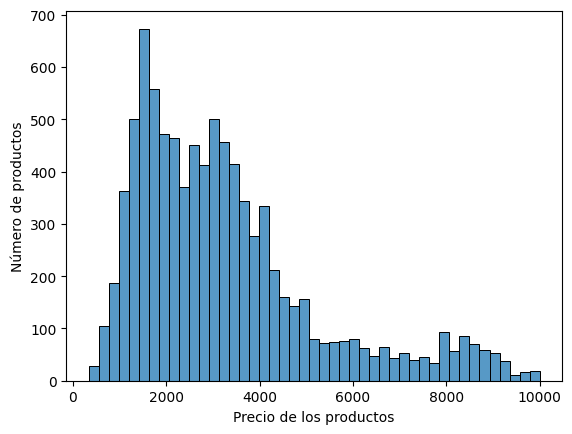

In [64]:
import seaborn as sns

# Crear un histograma usando Seaborn
fig = sns.histplot(data = df, x = 'precio')

# Adicionar nombres a ejes
fig.set_xlabel('Precio de los productos')
fig.set_ylabel('Número de productos')

Text(0.5, 0, 'Precio de los productos')

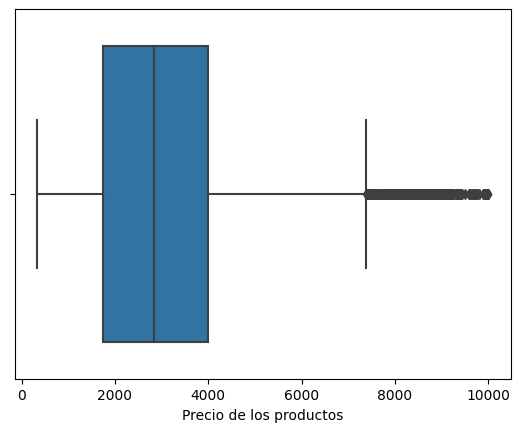

In [65]:
# Crear un boxplot
fig = sns.boxplot(data = df, x = 'precio')

# Adicionar el título
fig.set_xlabel('Precio de los productos')

#Redefinición y categorización de variables

####Redefinir

In [66]:
# Verificar el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8855 entries, 0 to 8854
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      8855 non-null   object 
 1   ciudad        8855 non-null   object 
 2   precio        8855 non-null   float64
 3   variabilidad  8855 non-null   float64
 4   fecha         8855 non-null   object 
 5   LATITUD       8855 non-null   float64
 6   LONGITUD      8855 non-null   float64
dtypes: float64(4), object(3)
memory usage: 484.4+ KB


####Categorizar

In [67]:
#Identificar precios únicos de la variable 'precio'
precios_unicos = df['precio'].unique()

#Encontrar el valor mínimo
minimo = min(precios_unicos)
#print("Valor mínimo:", minimo)

#Encontrar el valor máximo
maximo = max(precios_unicos)
#print("Valor máximo:", maximo)

#Definir los límites de categorización
limites = [minimo, 3000, 4000, maximo]
nombres_categorias = ['Económico', 'Moderado', 'Costoso']

#Categorizar los productos en grupos
df['categoria_precio'] = pd.cut(df['precio'], bins=limites, labels=nombres_categorias)
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD,categoria_precio
0,Arveja verde en vaina,armenia,7200.0,0.100,01ago2023,4.499501,-75.724900,Costoso
1,Arveja verde en vaina,bogotá,7925.0,0.110,01ago2023,4.316108,-74.181073,Costoso
2,Arveja verde en vaina,bucaramanga,6860.0,0.080,01ago2023,7.155834,-73.111570,Costoso
3,Arveja verde en vaina,cali,7733.0,-0.030,01ago2023,3.399044,-76.576493,Costoso
4,Arveja verde en vaina,cúcuta,9417.0,0.110,01ago2023,7.893910,-72.507820,Costoso
...,...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650.0,0.060,29ago2023,6.257590,-75.611031,Económico
8851,Yuca*,neiva,1525.0,0.035,29ago2023,2.993360,-75.272362,Económico
8852,Yuca*,pereira,1400.0,0.010,29ago2023,4.803663,-75.795791,Económico
8853,Yuca*,santa marta,1400.0,0.010,29ago2023,11.121894,-73.885279,Económico


La necesidad de categorizar variables depende del análisis que se quiera realizar, hay diversas formas de hacerlo. En este caso se optó por crear una categoría basada en el rango de precio de los productos, la cual clasifica cada producto en ‘Económico’, ‘Moderado’ y ‘Costoso’.

#Filtrado

In [68]:
#Encuentra el total de productos de la categoria 'Económico'
total_productos_economicos = len(df.loc[df['categoria_precio'] == 'Económico'])
print("Total de productos en la categoría de precios económicos:", total_productos_economicos)

Total de productos en la categoría de precios económicos: 4835


In [69]:
# Encuentra el producto con el precio máximo
producto_mas_caro = df[df['precio'] == df['precio'].max()]
ciudad_producto_mas_caro = producto_mas_caro['ciudad'].values[0]
print("La ciudad que tiene el producto más caro:", ciudad_producto_mas_caro)

La ciudad que tiene el producto más caro: pereira


In [70]:
#Calcula el promedio de variabilidad
promedio_variabilidad = df['variabilidad'].mean()

#Filtra los productos con variabilidad inferior al promedio
productos_baja_variabilidad = df[df['variabilidad'] < promedio_variabilidad]
productos_baja_variabilidad['producto']

3       Arveja verde en vaina
5       Arveja verde en vaina
6       Arveja verde en vaina
7       Arveja verde en vaina
8       Arveja verde en vaina
                ...          
8840     Plátano hartón verde
8841     Plátano hartón verde
8842     Plátano hartón verde
8843     Plátano hartón verde
8844                    Yuca*
Name: producto, Length: 5571, dtype: object

In [71]:
# Filtra el DataFrame para seleccionar solo las filas donde el producto es "Arveja verde en vaina" y la ciudad es "Neiva"
filtro_arveja_neiva = df[(df['producto'] == 'Arveja verde en vaina') & (df['ciudad'] == 'armenia')]


# Calcula el precio promedio de la Yuca en Neiva
precio_promedio_arveja_neiva = filtro_arveja_neiva['precio'].mean()

# Imprime el resultado
print("Precio promedio de la Arveja verde en vaina en Neiva es:", precio_promedio_arveja_neiva)

Precio promedio de la Arveja verde en vaina en Neiva es: 7054.545454545455


In [72]:
#Fecha del precio más bajo
fecha_precio_minimo = df[df['precio'] == df['precio'].min()]['fecha'].values[0]

#Fecha del precio más alto
fecha_precio_maximo = df[df['precio'] == df['precio'].max()]['fecha'].values[0]

print("Fecha del precio más bajo:", fecha_precio_minimo)
print("Fecha del precio más alto:", fecha_precio_maximo)

Fecha del precio más bajo: 28ago2023
Fecha del precio más alto: 14ago2023


#Graficos

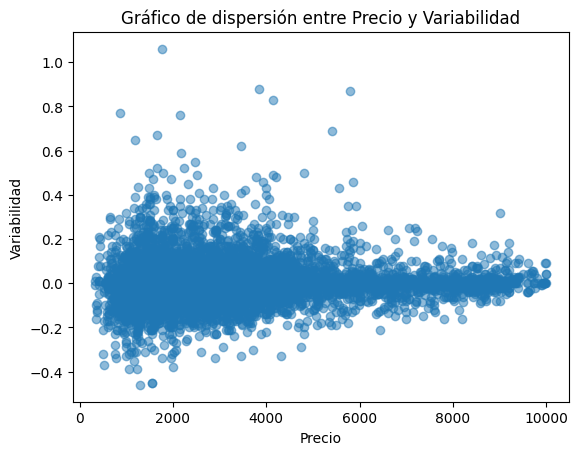

In [73]:
import matplotlib.pyplot as plt

#Extrae las columnas de precio y variabilidad
precio = df['precio']
variabilidad = df['variabilidad']

#Gráfico de dispersión
plt.scatter(precio, variabilidad, alpha=0.5)  #Alpha ajusta la transparencia de los puntos

#Etiqueta los ejes y da un título al gráfico
plt.xlabel("Precio")
plt.ylabel("Variabilidad")
plt.title("Gráfico de dispersión entre Precio y Variabilidad")
plt.show()


<ipython-input-74-2b139ebfc002>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=precio, y=variabilidad, cmap="Blues", shade=True)


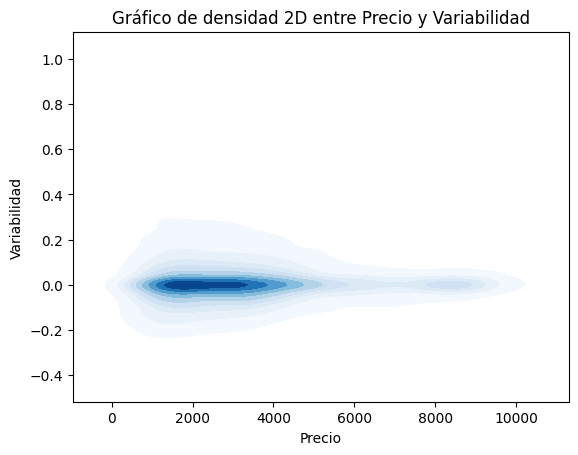

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

#Extrae las columnas de precio y variabilidad
precio = df['precio']
variabilidad = df['variabilidad']

#Gráfico de densidad 2D
sns.kdeplot(x=precio, y=variabilidad, cmap="Blues", shade=True)

#Etiqueta los ejes
plt.xlabel("Precio")
plt.ylabel("Variabilidad")

#Añade un título
plt.title("Gráfico de densidad 2D entre Precio y Variabilidad")
plt.show()


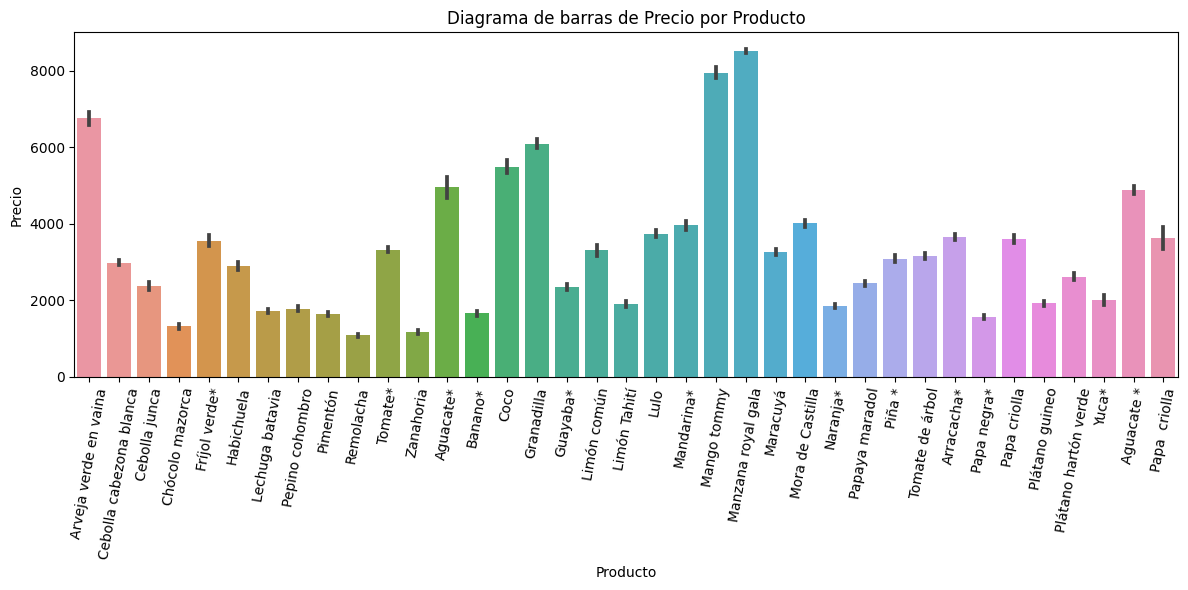

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura

#Utiliza Seaborn para crear un barplot
sns.barplot(x="producto", y="precio", data=df)

#Añade etiquetas y un título
plt.xlabel("Producto")
plt.ylabel("Precio")
plt.title("Diagrama de barras de Precio por Producto")

#Rota las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


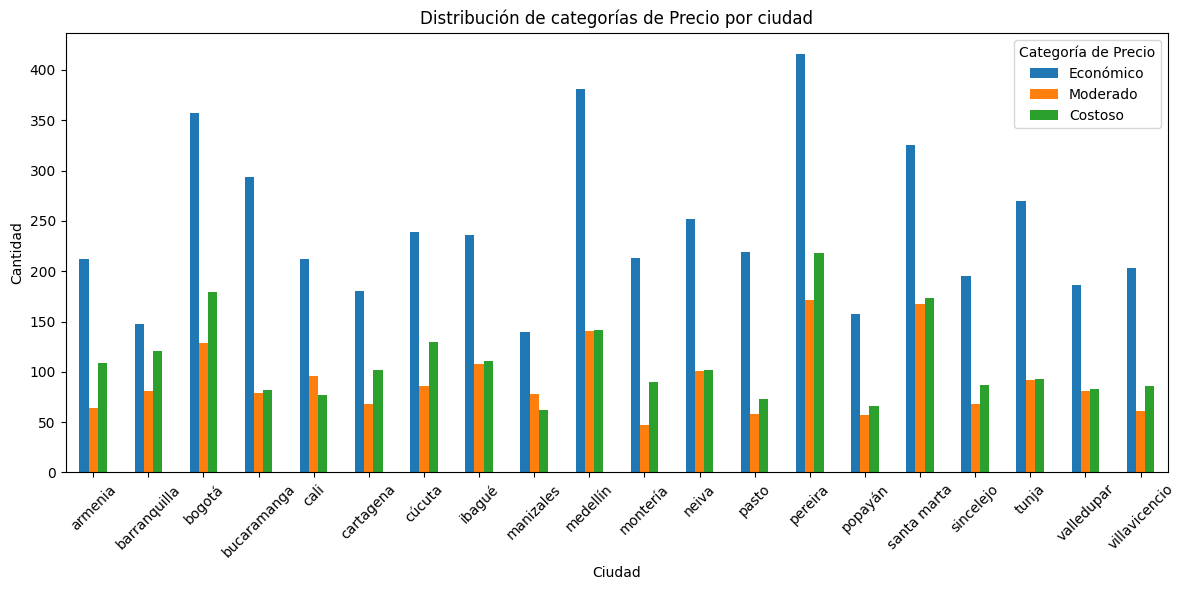

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

#Tabla de frecuencias cruzadas entre "ciudad" y "categoria_precio"
crosstab = pd.crosstab(df['ciudad'], df['categoria_precio'])

#Gráfico de barras agrupadas
crosstab.plot(kind='bar', figsize=(12, 6))

#Añade etiquetas y un título
plt.xlabel("Ciudad")
plt.ylabel("Cantidad")
plt.title("Distribución de categorías de Precio por ciudad")

#Muestra el gráfico
plt.legend(title="Categoría de Precio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

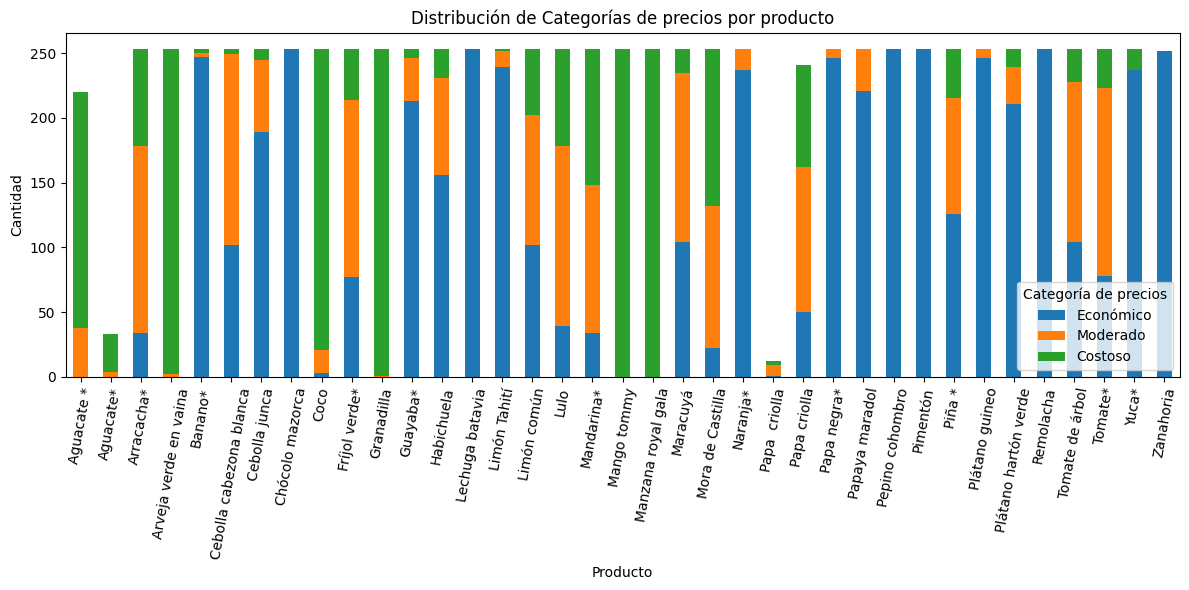

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

#Tabla de frecuencias cruzadas entre "producto" y "categoria_precio"
crosstab = pd.crosstab(df['producto'], df['categoria_precio'])

#Gráfico de barras apiladas
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))

#Añade etiquetas y un título
plt.xlabel("Producto")
plt.ylabel("Cantidad")
plt.title("Distribución de Categorías de precios por producto")

#Muestra el gráfico
plt.legend(title="Categoría de precios")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()
